 

# Project: Investigate a Dataset Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction

The purpose of this analysis is to investigate the Kaggle Medical Appointment dataset, which collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.  

The dataset includes following columns:  

PatientId - identification of a patient

AppointmentID - identification of each appointment

Gender - gender of a patient (male or female)

ScheduledDay - a date on which an appointment was scheduled

AppointmentDay - a date of an appointment

Age - age of a patient

Neighbourhood - a neighbourhood where an appointment took place

Scholarship - if a patient has government financial aid Bolsa Familia(yes or no).

Hipertension - if a patient has high blood pressure (yes or no)

Diabetes - if a patient has diabetes (yes or now)

Alcoholism - if a patient is suffering from alcoholism (yes or now)

Handcap - if a patient has disability the number of all of them

SMS_received - if a patient got a text message appointment reminders (yes or no)

No-show - if a patient came to an appointment: no(showed up) and yes (no show)

Based on the dataset, the following research questions were defined:  

1. Are patient no-shows related to a patient's personal diseases, such as hypertension, diabetes or alcoholism?


2. Do the appointment reminders affect the coming to the appointment?

 

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Show all columns
pd.set_option('display.max_columns', None)

<a id='wrangling'></a>
## Data Wrangling

 

### General Properties

In [112]:
data = 'data/noshowappointments-kagglev2-may-2016.csv'
medical_df = pd.read_csv(data)

In [113]:
medical_df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [114]:
medical_df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


Observations: 

Headers need some tuning. I will change headers in better format eg. lowercase labels and underscores between words.

There also columns(PatientId and AppointmentID) that do not add any value to my reseach questions. So I will delete those columns.

I will also change No-show column to numeric format for further analyses. The new format will be 1 = Showed up 0 = Did not show up, which is in line with other columns.

There is also couple typos. Hipertension should be hypertension and handcap should ne handicap. I will fix them as well

In [115]:
#Let's check the shape of the dataset
medical_df.shape

(110527, 14)

Observations: 

14 columns and 110527 rows. 

In [116]:
#Let's check data types and missing values
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Observations: 

It seems that there are no missing data. All columns have an equal number of rows (11057). 

ScheduledDay and AppointmentDay are in wrong datatype. Both are strings and should be datetime.


In [117]:
medical_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Observations: 

There are some problems in Age column. Min age is negative (-1) and max age is 115 years, which seams very high.

Let's check if there are any outliers in Age column

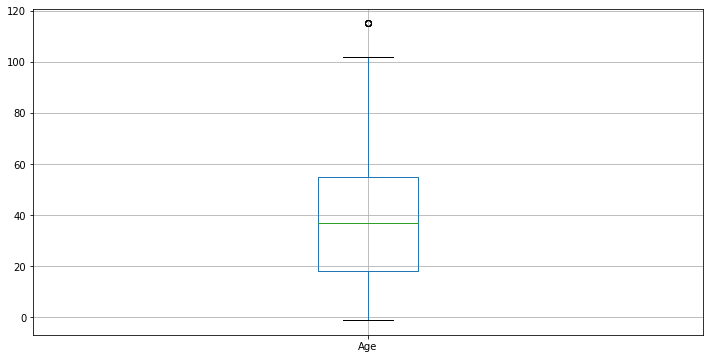

In [118]:
plt.figure(figsize =(12,6))
medical_df.boxplot('Age');

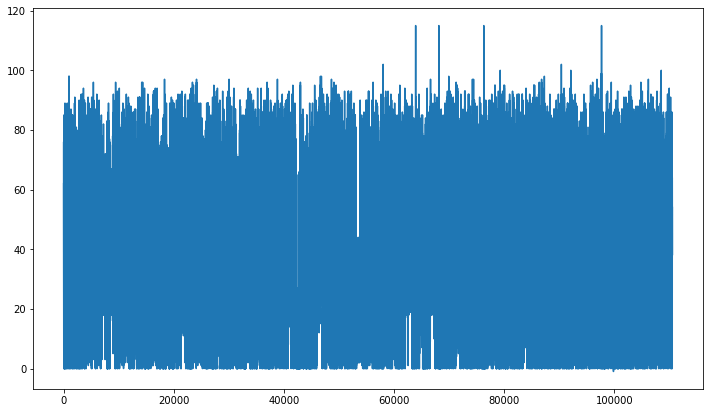

In [119]:
plt.figure(figsize =(12,7))
medical_df['Age'].plot();

Observations:

The 115 years old patients are also outliers from statistical point of view    

In [120]:
medical_df['Age'].sort_values(ascending = False)

97666     115
63912     115
68127     115
76284     115
63915     115
         ... 
102830      0
102832      0
102834      0
34218       0
99832      -1
Name: Age, Length: 110527, dtype: int64

Observations:
    
There are 5 115 year old patients and also one patients who is -1 years old. It doesn't look ok for me. Because there are enough information available (110527 rows), I will delete these outliers with age 115 and -1. 

In [121]:
#Let's check if there is any duplicates
print(medical_df.duplicated().sum())

0


Observation:
    
There are no duplicates

In [122]:
# Let's check if there is any null value in numeric columns
medical_df.isnull().sum().sort_values(ascending=False)

No-show           0
SMS_received      0
Handcap           0
Alcoholism        0
Diabetes          0
Hipertension      0
Scholarship       0
Neighbourhood     0
Age               0
AppointmentDay    0
ScheduledDay      0
Gender            0
AppointmentID     0
PatientId         0
dtype: int64

In [123]:
# Let's also check the non numeric no_show column.
medical_df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

Observation:
    
There are no null values in numeric columns and there are no other values than "Yes" or "No" in No-show column.

## Data Cleaning  

### Headers and no_show column 

In [124]:
medical_df.head(0)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Let's first delete those "useless" columns eg. PatientId and AppointmentID and modify the headers

In [125]:
medical_df.drop(['PatientId','AppointmentID'],axis = 1, inplace = True)

In [126]:
medical_df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [306]:
medical_df.rename(columns = {'scheduledday': 'scheduled_day'}, inplace = True)
medical_df.rename(columns = {'appointmentday': 'appointment_day'}, inplace = True)
medical_df.rename(columns = {'no-show': 'no_show'}, inplace = True)
medical_df.rename(columns = {'hipertension': 'hypertension'}, inplace = True)
medical_df.rename(columns = {'handcap': 'handicap'}, inplace = True)

In [128]:
medical_df['no_show'] = medical_df['no_show'].apply(lambda x:1 if x == 'No' else 0)

In [307]:
medical_df.head(5)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


Observations:
    
Headers and no_show column looks ok 

### Wrong Datatypes

In [242]:
medical_df['scheduled_day'] = pd.to_datetime(medical_df['scheduled_day'])

In [243]:
medical_df['appointment_day'] = pd.to_datetime(medical_df['appointment_day'])

In [132]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   gender           110527 non-null  object             
 1   scheduled_day    110527 non-null  datetime64[ns, UTC]
 2   appointment_day  110527 non-null  datetime64[ns, UTC]
 3   age              110527 non-null  int64              
 4   neighbourhood    110527 non-null  object             
 5   scholarship      110527 non-null  int64              
 6   hipertension     110527 non-null  int64              
 7   diabetes         110527 non-null  int64              
 8   alcoholism       110527 non-null  int64              
 9   handcap          110527 non-null  int64              
 10  sms_received     110527 non-null  int64              
 11  no_show          110527 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(8), object(2)
memory usag

Observations: 

Data types looks goog now

### Outliers in Age column 

In [133]:
#Number of patients over 90 years old
medical_df.query('age > 100')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
58014,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,1
63912,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
63915,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
68127,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
76284,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
90372,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,1
97666,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,1


In [134]:
#Number of patients under  years old
medical_df.query('age < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [135]:
medical_df.drop(index=[63912,63915,68127,76284, 97666,99832], inplace = True)

In [136]:
medical_df['age'].sort_values(ascending = False)

90372     102
58014     102
79272     100
92084     100
79270     100
         ... 
65397       0
82746       0
92122       0
65376       0
101552      0
Name: age, Length: 110521, dtype: int64

In [137]:
medical_df.age.describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: age, dtype: float64

Observation:
    
Age column looks Ok now

In [138]:
#Final look of the dataset
medical_df

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,1


<a id='eda'></a>
## Exploratory Data Analysis

 
### Research Question 1:  Are patient no-shows related to a patient's personal diseases, such as hypertension, diabetes or alcoholism?

Before going to exact reseach questions,let's have an overall look of the data.

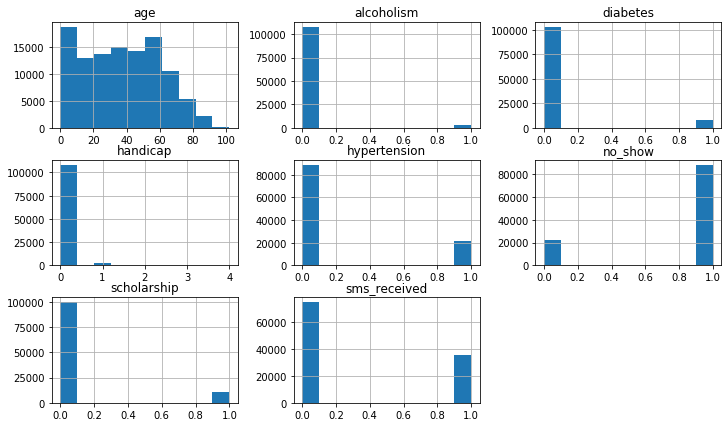

In [308]:
medical_df.hist(figsize =(12,7));

In [140]:
# How many of the patients showed and did not show
medical_df.no_show.value_counts()

1    88205
0    22316
Name: no_show, dtype: int64

In [141]:
#Same in percentage, rounded by 2 decimals
round(medical_df.no_show.value_counts(normalize=True),2)

1    0.8
0    0.2
Name: no_show, dtype: float64

Observations:

Very few patients is an alcoholic, have handicap or other diseases

There are 88205 patients(~ 80%) who showed up to appointment and 22316(~ 20%) patients who didn't. 

### Hypertension

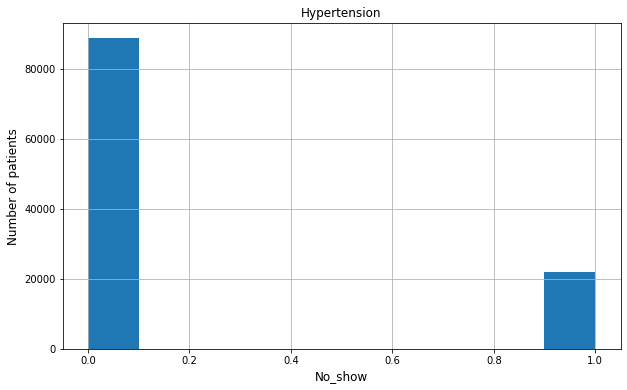

In [281]:
plt.figure(figsize = [10,6])
medical_df.hypertension.hist()
plt.title('Hypertension', fontsize = 12)
plt.xlabel('No_show',fontsize = 12)
plt.ylabel('Number of patients', fontsize = 12)
plt.show();

In [254]:
#How many patients have hypertension
medical_df.hypertension.value_counts()

0    88721
1    21800
Name: hypertension, dtype: int64

In [246]:
# Same in percentages, rounded by 2 desimals
round(medical_df.hypertension.value_counts(normalize=True),2)

0    0.8
1    0.2
Name: hypertension, dtype: float64

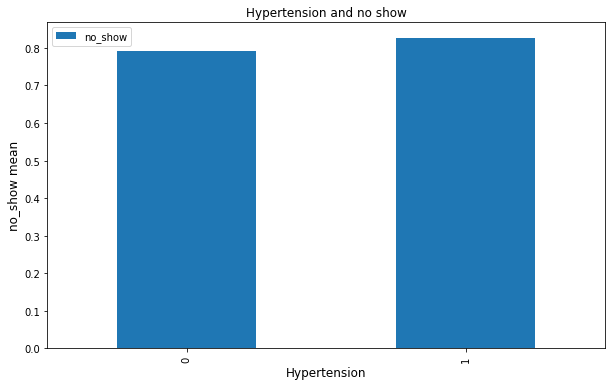

In [295]:
plt.figure(figsize=(10,6))
medical_df.groupby('hypertension').no_show.mean().plot(kind='bar')
plt.title('Hypertension and no show')
plt.xlabel('Hypertension', fontsize = 12)
plt.ylabel('no_show mean', fontsize = 12)
plt.legend()
plt.show();

In [346]:
round(medical_df.groupby('hypertension').no_show.mean(),2)

hypertension
0    0.79
1    0.83
Name: no_show, dtype: float64

Observation:

83% of the patients, who has a hypertension showed up and 79% of people who don't have a hypertension showed up.

There is a clear evidence that patients with a hypertension seems to go to their appointments better than patients without a hypertension.  

## Diabetes

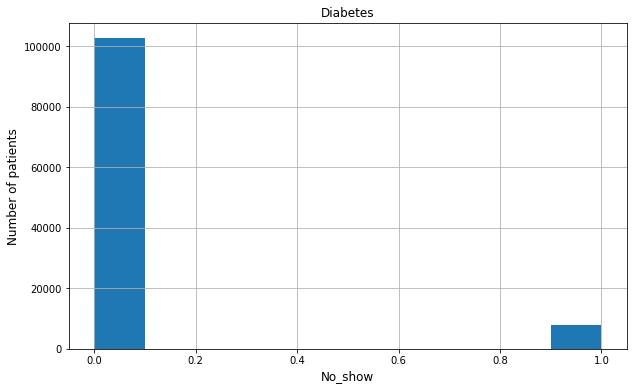

In [288]:
plt.figure(figsize = [10,6])
medical_df.diabetes.hist()
plt.title('Diabetes', fontsize = 12)
plt.xlabel('No_show',fontsize = 12)
plt.ylabel('Number of patients', fontsize = 12)
plt.show();

In [289]:
#How many patients have diabetes
medical_df.diabetes.value_counts()

0    102578
1      7943
Name: diabetes, dtype: int64

In [290]:
# Same in percentages, rounded by 2 decimals
round(medical_df.diabetes.value_counts(normalize=True),2)

0    0.93
1    0.07
Name: diabetes, dtype: float64

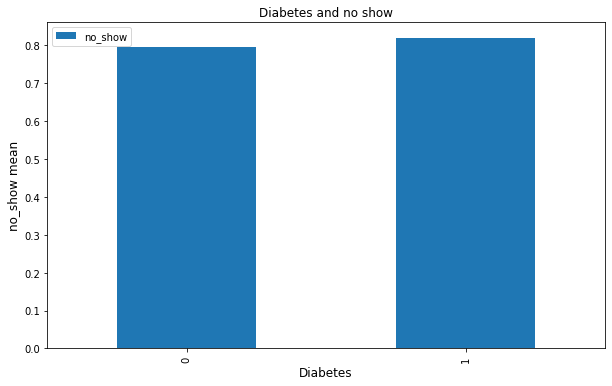

In [294]:
plt.figure(figsize=(10,6))
medical_df.groupby('diabetes').no_show.mean().plot(kind='bar')
plt.title('Diabetes and no show')
plt.xlabel('Diabetes', fontsize = 12)
plt.ylabel('no_show mean', fontsize = 12)
plt.legend()
plt.show(); 

In [347]:
round(medical_df.groupby('diabetes').no_show.mean(),2)

diabetes
0    0.80
1    0.82
Name: no_show, dtype: float64

Observation:

82% of the patients who have a diabetes showed up and 80% of the patients who doesn't have diabetes showed up.

There is a clear evidence that also patients with diabetes seems to go to their appointments better than patients without diabetes.  

## Alcoholism

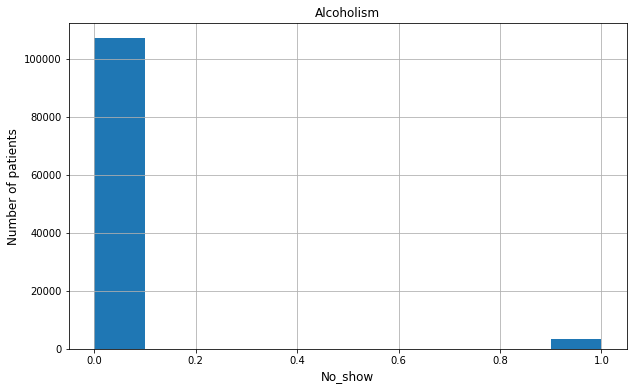

In [296]:
plt.figure(figsize = [10,6])
medical_df.alcoholism.hist()
plt.title('Alcoholism', fontsize = 12)
plt.xlabel('No_show',fontsize = 12)
plt.ylabel('Number of patients', fontsize = 12)
plt.show();

In [297]:
#How many patients have an alcoholism
medical_df.alcoholism.value_counts()

0    107161
1      3360
Name: alcoholism, dtype: int64

In [298]:
# Same in percentages, rounded by 2 decimals
round(medical_df.diabetes.value_counts(normalize=True),2)

0    0.93
1    0.07
Name: diabetes, dtype: float64

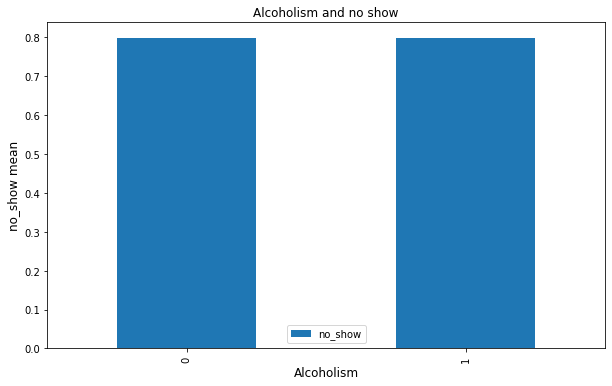

In [299]:
plt.figure(figsize=(10,6))
medical_df.groupby('alcoholism').no_show.mean().plot(kind='bar')
plt.title('Alcoholism and no show')
plt.xlabel('Alcoholism', fontsize = 12)
plt.ylabel('no_show mean', fontsize = 12)
plt.legend()
plt.show(); 

In [348]:
round(medical_df.groupby('alcoholism').no_show.mean(),2)

alcoholism
0    0.8
1    0.8
Name: no_show, dtype: float64

Observation:

80% of the patients who are alcoholic showed up and also 80% of the patients who are not alcoholic showed up.

There is no evidence that alcoholism has any impact to patients appointments.  

### Research Question 2:  Do the appointment reminders affect the coming to the appointment?

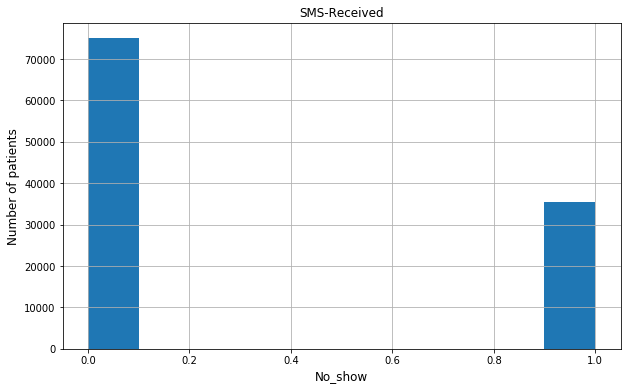

In [321]:
plt.figure(figsize = [10,6])
medical_df.sms_received.hist()
plt.title('SMS-Received', fontsize = 12)
plt.xlabel('No_show',fontsize = 12)
plt.ylabel('Number of patients', fontsize = 12)
plt.show();

In [322]:
#How many patients received the notification
medical_df.sms_received.value_counts()

0    75040
1    35481
Name: sms_received, dtype: int64

In [323]:
# Same in percentages, rounded by 2 decimals
round(medical_df.sms_received.value_counts(normalize=True),2)

0    0.68
1    0.32
Name: sms_received, dtype: float64

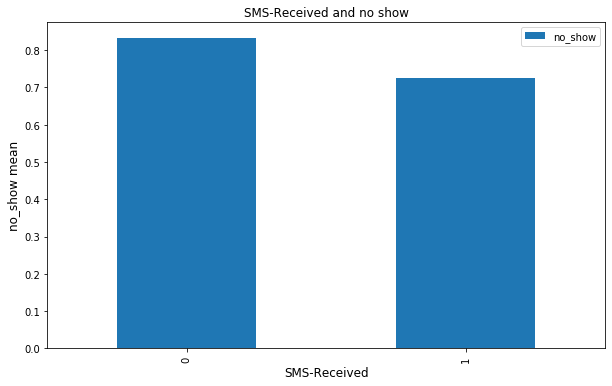

In [324]:
plt.figure(figsize=(10,6))
medical_df.groupby('sms_received').no_show.mean().plot(kind='bar')
plt.title('SMS-Received and no show')
plt.xlabel('SMS-Received', fontsize = 12)
plt.ylabel('no_show mean', fontsize = 12)
plt.legend()
plt.show();

In [ ]:
showed = medical_df.no_show == False
not_showed = medical_df.no_show == True

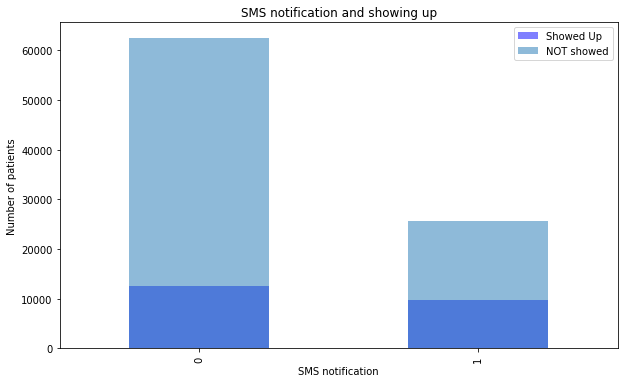

In [341]:
plt.figure(figsize=(10,6))
medical_df[showed]["sms_received"].value_counts().plot(kind="bar", label="Showed Up", alpha = 0.5, color="b");
medical_df[not_showed]["sms_received"].value_counts().plot(kind = "bar", label="NOT showed", alpha = 0.5, );
plt.title('SMS notification and showing up')
plt.xlabel('SMS notification')
plt.ylabel('Number of patients')
plt.legend();

In [349]:
round(medical_df.groupby('sms_received').no_show.mean(),2)

sms_received
0    0.83
1    0.72
Name: no_show, dtype: float64

Observations:

72% of the patients who received a SMS notification showed up and 83% of the patients who didn't receive a notification showed up.
    
This is very strange result and probably needs more carefull investigation. 

But at the moment, there is no evidence of that notifications has any positive impact to patients appointments. 

<a id='conclusions'></a>
## Conclusions
 

The main findings of my analysis are listed below:

1.Patients with diabetes seems to go to their appointments better than patients without diabetes.

2.Patients with hypertension seems to go to their appointments better than patients without hypertension.

3.There no evidence that alcoholism has any impact to patients appoinments.

4.Patients who received a SMS notification are less likely to show up than patients who didn't receive any SMS message.

Limitations:

I didn't find any major limitations that could have been endanger my analysis. However there was very little information available about the data itself and especially the results of the SMS notification were very strange.

## References

In [ ]:
1. Udemy.com courses:

https://www.udemy.com/course/the-pandas-bootcamp/
https://www.udemy.com/course/data-science-for-business-6-real-world-case-studies/

2. Udacity.com

Course material 

3. stackoverflow.com 
